In [1]:
  import numpy as np
  from sklearn.linear_model import LogisticRegression
  from sklearn import svm
  from sklearn import datasets		
  from sklearn import svm    			
  import numpy as np
  import matplotlib.pyplot as plt   
  from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [2]:
# import iris data to model Svm classifier
I_D=datasets.load_iris()

In [3]:
I_D['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
I_D['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

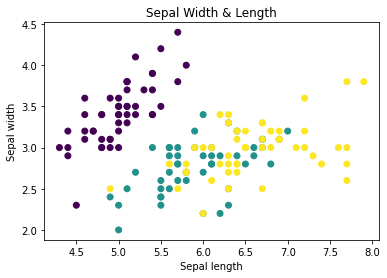

In [5]:
#visualize_sepal_data taking first two features
x=I_D.data[:,:2]  
y=I_D.target
plt.scatter(x[:,0],x[:,1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal Width & Length')
plt.show()

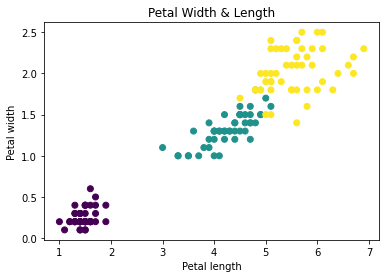

In [6]:
#visualize_petal_data taking last two features
x=I_D.data[:,2:]  
y=I_D.target
plt.scatter(x[:,0],x[:,1], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width & Length')
plt.show()

In [7]:
# Now we use a spilt function

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(I_D.data,I_D.target,test_size=0.2)

In [8]:
#we apply a support vector m/c

#SVM model with linear kernel
x_sepal=x_train[:,:2] 
y_sepal=y_train

svc=svm.SVC(kernel='linear', C=2.8).fit(x_sepal,y_sepal)

In [9]:
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=2.8,max_iter=3000).fit(x_sepal, y_sepal)

# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=2.8).fit(x_sepal, y_sepal)

# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=2.8).fit(x_sepal, y_sepal)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
# Sepal test parformance

y_pred_svc=svc.predict(x_test[:,:2])
y_pred_lin_svc=lin_svc.predict(x_test[:,:2])
y_pred_rbf_svc=rbf_svc.predict(x_test[:,:2])
y_pred_poly_svc=poly_svc.predict(x_test[:,:2])

#print Sepal test Praformance

from sklearn.metrics import accuracy_score as ac
print("Accuracy Score:")
print('SVM with kernel(linear):',ac(y_test,y_pred_svc)*100)
print('SVM with linear svc:',ac(y_test,y_pred_lin_svc)*100)
print('SVM with kernel(rbf):',ac(y_test,y_pred_rbf_svc)*100)
print('SVM with kernel(poly):',ac(y_test,y_pred_poly_svc)*100)

Accuracy Score:
SVM with kernel(linear): 80.0
SVM with linear svc: 83.33333333333334
SVM with kernel(rbf): 80.0
SVM with kernel(poly): 83.33333333333334


In [11]:
# sepal training performance

y_pred_svc=svc.predict(x_sepal)
y_pred_lin_svc=lin_svc.predict(x_sepal)
y_pred_rbf_svc=rbf_svc.predict(x_sepal)
y_pred_poly_svc=poly_svc.predict(x_sepal)

# print for sepal training performance

from sklearn.metrics import accuracy_score as ac
print("Accuracy Score:")
print('SVM with kernel(linear):',ac(y_sepal,y_pred_svc)*100)
print('SVM with linear svc:',ac(y_sepal,y_pred_lin_svc)*100)
print('SVM with kernel(rbf):',ac(y_sepal,y_pred_rbf_svc)*100)
print('SVM with kernel(poly):',ac(y_sepal,y_pred_poly_svc)*100)


Accuracy Score:
SVM with kernel(linear): 80.0
SVM with linear svc: 80.0
SVM with kernel(rbf): 80.0
SVM with kernel(poly): 77.5


In [12]:
#SVM model with linear kernel
x_petal=x_train[:,2:] 
y_petal=y_train

svc1=svm.SVC(kernel='linear', C=1.0).fit(x_petal,y_petal)

In [13]:
# LinearSVC (linear kernel)
lin_svc1 = svm.LinearSVC(C=1.0,max_iter=3000).fit(x_petal, y_petal)

# SVC with RBF kernel
rbf_svc1 = svm.SVC(kernel='rbf', gamma=0.7, C=1.0).fit(x_petal, y_petal)

# SVC with polynomial (degree 3) kernel
poly_svc1 = svm.SVC(kernel='poly', degree=5, C=1.0).fit(x_petal, y_petal)

In [14]:
# Testing performance for Petal
y_pred_svc1=svc.predict(x_test[:,2:])
y_pred_lin_svc1=lin_svc.predict(x_test[:,2:])
y_pred_rbf_svc1=rbf_svc.predict(x_test[:,2:])
y_pred_poly_svc1=poly_svc.predict(x_test[:,2:])

# print testing performance for Petal

print("Accuracy Score:")
print('SVM with kernel(linear):',ac(y_test,y_pred_svc1)*100)
print('SVM with linear svc:',ac(y_test,y_pred_lin_svc1)*100)
print('SVM with kernel(rbf):',ac(y_test,y_pred_rbf_svc1)*100)
print('SVM with kernel(poly):',ac(y_test,y_pred_poly_svc1)*100)

Accuracy Score:
SVM with kernel(linear): 70.0
SVM with linear svc: 36.666666666666664
SVM with kernel(rbf): 36.666666666666664
SVM with kernel(poly): 56.666666666666664


In [15]:
# Petal training performance

y_pred_svc1=svc.predict(x_petal)
y_pred_lin_svc1=lin_svc.predict(x_petal)
y_pred_rbf_svc1=rbf_svc.predict(x_petal)
y_pred_poly_svc1=poly_svc.predict(x_petal)

# print for sepal training performance

from sklearn.metrics import accuracy_score as ac
print("Accuracy Score:")
print('SVM with kernel(linear):',ac(y_petal,y_pred_svc1)*100)
print('SVM with linear (svc):',ac(y_petal,y_pred_lin_svc1)*100)
print('SVM with kernel(rbf):',ac(y_petal,y_pred_rbf_svc1)*100)
print('SVM with kernel(poly):',ac(y_petal,y_pred_poly_svc1)*100)




Accuracy Score:
SVM with kernel(linear): 66.66666666666666
SVM with linear (svc): 33.33333333333333
SVM with kernel(rbf): 32.5
SVM with kernel(poly): 60.83333333333333


In [16]:
  clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
  clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
  clf3 = svm.SVC()

In [17]:
##VOTING CLASSIFIER
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('log_reg', clf1), ('rf', clf2), ('svm', clf3)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(x_sepal, y_sepal)

#test our model on the test data
ensemble.score(x_sepal, y_sepal)

0.8083333333333333